# Exploratory Data Analysis of ~20k tweets from 9/11/2016 to 12/12/2016.

   Today Demonetisation is something that has affected every single person in the country, in a mostly direct way. Though are no official stats on the impact it had on the economy in the last 40 days or so I thought it would be interesting to explore the general sentiment on Twitter, to understand what folks from diverse walks of life think.
  
  It was easier said than done. Depending on the way you see it, Twitter data is either entirely usesless or is very difficult to classify. Though I certainly dont think Twitter as the gold standard of the country's opinion, I still valid  opinions are voiced there and it's worth taking a look. 
  
 I compiled close to 20,000 tweets, from 9/11/2016 to 12/12/2016, classified sentiments using Indico.io's sentiment classifier and also hand classified a few tweets written in Hinglish.
 
 These were the questions I was trying to get answered with these tweets:
 * What was the average sentiment over these 34 days. 
 * A word-cloud of both positive/negative tweets. 
 * How did sentiments change over a period of time in India's top 10 cities by population. What were folks outside india saying and how did that change over time?
 * Where did the most positive tweets come from? Where did the most negative tweets come from?
 * What were Twitter's "influencers" saying about this move? And how did that change over time?
 * How did the north of india react? How did the south of India react?

In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import indicoio as indico
import matplotlib as mpl
import matplotlib.pyplot as plt
import collections
from collections import OrderedDict
import plotly
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
import string
from scipy.misc import imread
import geopy
from geopy.geocoders import Nominatim


%matplotlib inline
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('tweets.csv')

In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True, errors = 'ignore')

In [5]:
df.columns

Index(['user id', 'name', 'handle', 'date', 'retweets', 'favorites', 'text',
       'id', 'permalink', 'language', 'followers_count', 'location',
       'sentiment'],
      dtype='object')

In [6]:
df.head()

,user id,name,handle,date,retweets,favorites,text,id,permalink,language,followers_count,location,sentiment
0,7.108627e+17,The gamer,VenkateshaPanc2,2016-11-09 23:38:24,0.0,0.0,If common man is supporting the decision why c...,7.964142e+17,https://twitter.com/VenkateshaPanc2/status/796...,en,6.0,"Indore, India",0.712256
1,7.291956e+07,Uma Kant Singh,umakantsingh_in,2016-11-09 23:38:42,0.0,0.0,"#DeMonetisation,Not govt of common man,PM who ...",7.964142e+17,https://twitter.com/umakantsingh_in/status/796...,en,455.0,New Delhi,0.433632
2,2.381901e+08,Antony bothagar,Antonybothagar,2016-11-09 23:38:46,0.0,1.0,I am already suffering to get changes for ₹ 10...,7.964142e+17,https://twitter.com/Antonybothagar/status/7964...,en,76.0,NaN,0.844959
3,2.433278e+09,Abhishek Sharma,skyneeldotcom,2016-11-09 23:38:53,1.0,1.0,#APPSC #Recruitment 2016 – Apply Online for 98...,7.964143e+17,https://twitter.com/skyneeldotcom/status/79641...,en,6288.0,NaN,0.568757
4,3.246635e+09,abdul rahman,RahmanAbdul2603,2016-11-09 23:39:21,0.0,0.0,#DeMonetisation almst everybody knows fr a mar...,7.964144e+17,https://twitter.com/RahmanAbdul2603/status/796...,en,48.0,"Saharanpur, India",0.080881


## Lets first look at overall sentiment over the course of these 34 days.

In [7]:
## Get average sentiment for each week. For that, return Dataframes for each week.  
def search(df, *words):  #1
    return df[np.logical_or.reduce([df['date'].str.contains(word) for word in words])]
week1 = search(df,"2016-11-09","2016-11-10","2016-11-11","2016-11-12","2016-11-13","2016-11-14","2016-11-15","2016-11-16")

## Maybe we can look at the data in a slightly granular way. Mean sentiment for each day. 
### A scatter plot would help.

In [8]:
day_count = df['date'].unique().tolist()
day_count = [i.split(' ', 1)[0] for i in day_count] #remove time-stamps.
day_count = list(OrderedDict.fromkeys(day_count))
mean_sentiment_each_day = []
for i in range(0, 34):
    mean_sentiment_each_day.append((search(df,day_count[i])['sentiment'].mean())*100) ## 
print(mean_sentiment_each_day)



[53.136832903225809, 52.921829355149171, 50.774063636363628, 48.179133333333333, 51.16975626598466, 53.476719999999986, 50.039012499999998, 51.350087678339818, 51.913394965986392, 47.948271313672933, 52.364179829545456, 48.739098203592818, 52.228293522267208, 48.062430821917815, 51.705255329949239, 49.913779966887411, 47.832414985994397, 55.673494999999981, 39.815657142857141, 49.845762499999999, 51.119342201834861, 45.726437500000003, 45.608518881118883, 47.380484290540537, 49.258282573099414, 50.329545744680857, 47.727182420091324, 49.08963748458693, 47.717728712871285, 44.266404385964911, 47.598505787781356, 48.914792917166871, 48.785451050679853, 47.431779556898285]


In [9]:
## Create a new dataframe for plotting it as a scatter plot. 
mean_sentiment_df = pd.DataFrame()
mean_sentiment_df['day_count'] = list(range(0,34))
mean_sentiment_df['mean_sentiment'] = mean_sentiment_each_day
mean_sentiment_df.head()

,day_count,mean_sentiment
0,0,53.136833
1,1,52.921829
2,2,50.774064
3,3,48.179133
4,4,51.169756


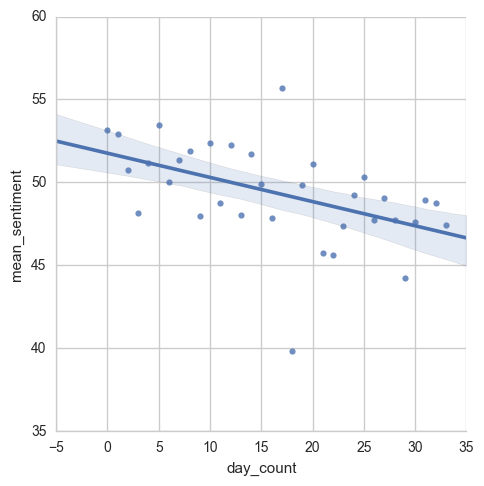

In [10]:
sns.lmplot(x="day_count", y="mean_sentiment", data=mean_sentiment_df)

### There's definitely a decline in sentiment over 34 days. It would also be interesting to see how many tweets were in each interval. 

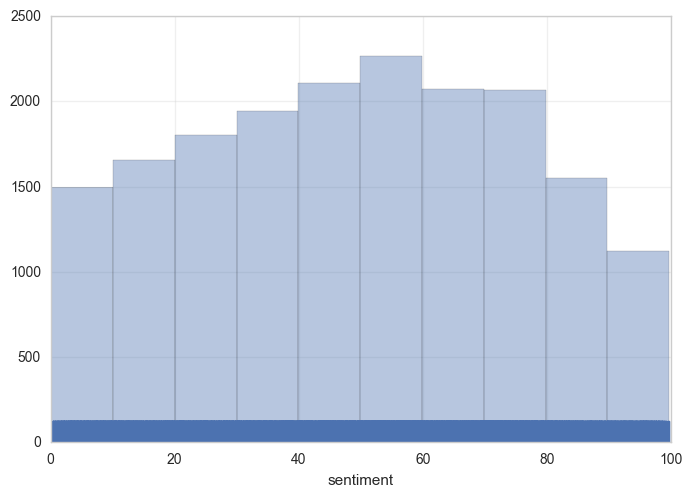

In [405]:
sns.distplot((df['sentiment']*100), bins=10, kde=False, rug=True);

## Let's try and visualise a word cloud for tweets.

In [12]:
# a dataframe of positive and negative with just the 'text' and 'sentiment' column.
only_text_and_sentiments = df[['text','sentiment']]
positive_tweets = only_text_and_sentiments[only_text_and_sentiments['sentiment'] > 0.5]
positive_tweets = positive_tweets.sort_values('sentiment',ascending=False)
negative_tweets = only_text_and_sentiments[only_text_and_sentiments['sentiment'] < 0.5]
negative_tweets = negative_tweets.sort_values('sentiment',ascending=False)

### A wordcloud of all tweets masked on a map of India.

In [13]:
all_words = ''
intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)
for val in only_text_and_sentiments["text"]:
    text = val.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"pic.twitter\S+", "",text)
    text = text.translate(trantab)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        all_words = all_words + words + ' '
all_wordcloud = WordCloud(width=900, height=500).generate(all_words)


plt.figure( figsize=(30,20), facecolor='k')
plt.imshow(all_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

KeyboardInterrupt: 

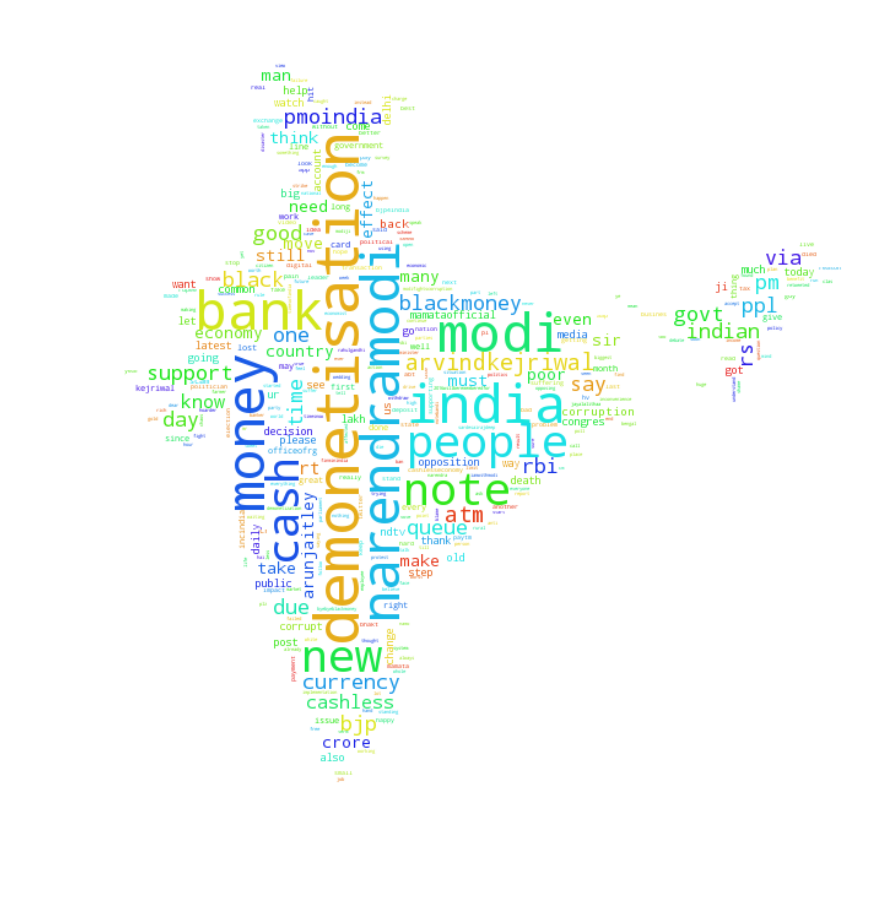

In [142]:
# Mask it over a map of india. For 'em data nerds.
india_map = imread("india-map.png")
wc = WordCloud(width=900, height=500,background_color="white", max_words=2000, mask=india_map)
wc.generate(all_words)

plt.figure(figsize=(9,9))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Now, to visualise sentiment over a period of time in each major city in the country. We'll plot changes in sentiment for india's top 10 cities over a period of time. 

In [78]:
# Top cities of india by GDP.
top_10_cities = ['Mumbai','Delhi','Kolkata','Bengaluru','Hyderabad','Chennai','Ahmedabad','Pune','Surat','Visakhapatnam']
cities_combination = ["Mumbai","Bombay","Bombay, India","Mumbai, India","mumbai","Bangalore,India","Bengaluru, India",
                      "B'lore","Bengaluru","Bangalore","Bengaluru South, India","Gurgaon, India","Hyderabad, India","Hyderabad","Delhi, India",
                      "New Delhi, India","Delhi","New Delhi","Noida, India","Noida","Chennai, India",
                      "Chennai","Madras, India","Madras","Kolkata, India","Kolkata",
                      "Ahmedabad, India","Ahmedabad","Pune, India","Pune",
                      "Surat, India","Surat","Visakhapatnam, India","Visakhapatnam"]

top_10_df = df[df['location'].isin(cities_combination)]
top_10_df.head(2)
            

,user id,name,handle,date,retweets,favorites,text,id,permalink,language,followers_count,location,sentiment
1,72919562.0,Uma Kant Singh,umakantsingh_in,2016-11-09 23:38:42,0.0,0.0,"#DeMonetisation,Not govt of common man,PM who ...",7.964142e+17,https://twitter.com/umakantsingh_in/status/796...,en,455.0,New Delhi,0.433632
8,589197875.0,Common Sense,CommonSense___,2016-11-09 23:39:50,0.0,0.0,For Indian fiberals anything is war & everythi...,7.964145e+17,https://twitter.com/CommonSense___/status/7964...,en,244.0,"Pune, India",0.713806


In [79]:
for index, row in top_10_df.iterrows():
    if(row['location'] in "Mumbai|Bombay|Bombay, India|Mumbai, India|mumbai"):
        top_10_df.set_value(index,'location',"Mumbai, India")
   
    elif(row['location'] in "Bangalore,India|Bengaluru, India|B'lore|Bengaluru|Bangalore|Bengaluru South, India"):
        top_10_df.set_value(index,'location',"Bengaluru, India")
    
    elif(row['location'] in "Hyderabad, India|Hyderabad|hyderabad"):
        top_10_df.set_value(index,'location',"Hyderabad, India")
    
    elif(row['location'] in "Delhi, India|New Delhi, India|Delhi|New Delhi"):
        top_10_df.set_value(index,'location',"New Delhi, India")
   
    elif(row['location'] in "Gurgaon, India|gurgaon|Gurgaon"):
        top_10_df.set_value(index,'location',"Gurgaon, India")
        
    elif(row['location'] in "Noida, India|Noida"):
        top_10_df.set_value(index,'location',"Noida, India")
    
    elif(row['location'] in "Chennai, India|Chennai|Madras, India|Madras"):
        top_10_df.set_value(index,'location',"Chennai, India")
    
    elif(row['location'] in "Kolkata, India|Kolkata|Calcutta|Calcutta, India"):
         top_10_df.set_value(index,'location',"Kolkata, India")
    
    elif(row['location'] in "Ahmedabad, India|Ahmedabad"):
         top_10_df.set_value(index,'location',"Ahmedabad, India")
    
    elif(row['location'] in "Pune, India|Pune"):
         top_10_df.set_value(index,'location',"Pune, India")
    
    elif(row['location'] in "Surat, India|Surat"):
         top_10_df.set_value(index,'location',"Surat, India")
    
    elif(row['location'] in "Visakhapatnam, India|Visakhapatnam"):
         top_10_df.set_value(index,'location',"Visakhapatnam, India")
    
    
# top_10_df[top_10_df['location'] == "Bengaluru, India"]



## Average sentiment in each major city.

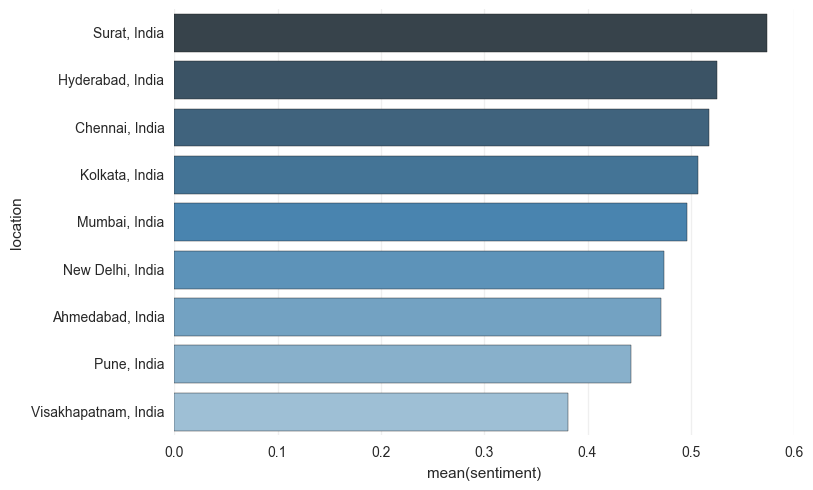

In [400]:
avg = top_10_df.groupby(['location'],as_index=False)['sentiment'].mean()
ncr_sentiment = (avg.iloc[3]['sentiment'] + avg.iloc[7]['sentiment'] + avg.iloc[8]['sentiment']) / 3
avg.drop(avg.index[[1,3,8]],inplace=True)

avg.sort_values('sentiment',ascending=False,inplace=True)
avg.reset_index(drop=True,inplace=True)
avg
sns.set_color_codes("pastel")
sns.barplot(x="sentiment", y="location", data=avg,
            label="City", palette="Blues_d")
#ax.set(xlim=(0.05,0.5))
sns.despine(left=True, bottom=True)

### It would also be interesting to see how this changes over time for each city. 

In [402]:
new_df = top_10_df.groupby(['location','date'],as_index=False)['sentiment'].sum()
day_count = new_df['date'].unique().tolist()
day_count = [i.split(' ', 1)[0] for i in day_count] #remove time-stamps.
day_count = list(OrderedDict.fromkeys(day_count))
ahd_sentiment = {}
chn_sentiment = {}
surat_sentiment = {}
hyd_sentiment = {}
noida_sentiment = {}
delhi_sentiment = {}
gurgoan_sentiment = {}
kol_sentiment = {}
mum_sentiment = {}
pune_sentiment = {}
vis_sentiment = {}
blr_sentiment = {}

for day in day_count:
    ahd_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Ahmedabad")]['sentiment'].mean()
    chn_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Chennai")]['sentiment'].mean()
    surat_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Sura|t")]['sentiment'].mean()
    hyd_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Hyderabad")]['sentiment'].mean()
    noida_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Noida")]['sentiment'].mean()
    delhi_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("New Delhi")]['sentiment'].mean()
    gurgoan_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Gurgaon")]['sentiment'].mean()
    kol_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Kolkata")]['sentiment'].mean()
    mum_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Mumbai")]['sentiment'].mean()
    pune_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Pune")]['sentiment'].mean()
    vis_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Visakhapatnam")]['sentiment'].mean()
    blr_sentiment[day] = new_df[new_df["date"].str.contains(day) & new_df["location"].str.contains("Bengaluru")]['sentiment'].mean()

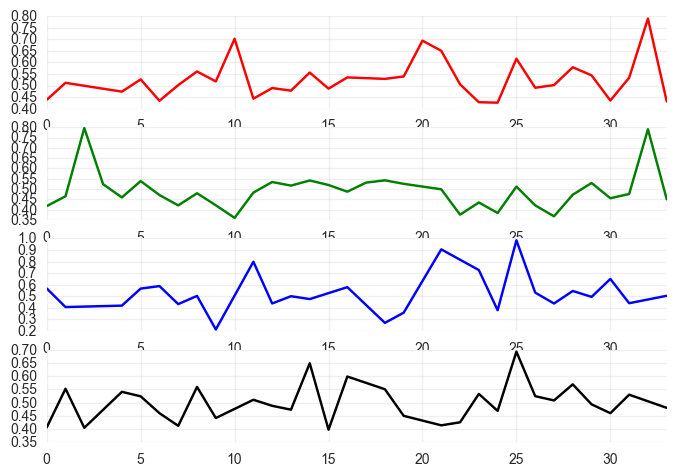

In [403]:
## Plot 4 grids. 
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1)
sns.tsplot(data=pd.Series(list(mum_sentiment.values())).interpolate(),color="red",ax=ax1)
sns.tsplot(data=pd.Series(list(delhi_sentiment.values())).interpolate(),color="green",ax=ax2)
sns.tsplot(data=pd.Series(list(kol_sentiment.values())).interpolate(),color="blue",ax=ax3)
sns.tsplot(data=pd.Series(list(blr_sentiment.values())).interpolate(),color="black",ax=ax4)

sns.despine(left=True, bottom=True)

In [404]:
influencers_df = df[df['followers_count'] > 10000]